# English Football Pyramid - Análisis Completo (1993-2025)

Análisis integral de las 5 divisiones del fútbol inglés: Premier League, Championship, League One, League Two y National League.

## 1. Configuración e Importación de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [2]:
# Cargar datasets
df = pd.read_csv('english_leagues_completo.csv')
tracking = pd.read_csv('english_leagues_tracking.csv')

print(f"📊 Dataset Principal Cargado")
print(f"   Total registros: {len(df):,}")
print(f"   Divisiones: {df['Division'].nunique()}")
print(f"   Temporadas: {df['Temporada'].nunique()}")
print(f"   Equipos únicos: {df['Equipo'].nunique()}")
print(f"\n📈 Tracking Cargado")
print(f"   Equipos rastreados: {len(tracking):,}")

# Mostrar primeras filas
df.head(10)

📊 Dataset Principal Cargado
   Total registros: 3,260
   Divisiones: 5
   Temporadas: 32
   Equipos únicos: 160

📈 Tracking Cargado
   Equipos rastreados: 160


,Temporada,Division,Pos,Equipo,PJ,G,E,P,Pts,GF,GC,Dif
0,1993-94,Premier League,1,Man United,42,27,11,4,92,80,38,42
1,1993-94,Premier League,2,Blackburn,42,25,9,8,84,63,36,27
2,1993-94,Premier League,3,Newcastle,42,23,8,11,77,82,41,41
3,1993-94,Premier League,4,Arsenal,42,18,17,7,71,53,28,25
4,1993-94,Premier League,5,Leeds,42,18,16,8,70,65,39,26
5,1993-94,Premier League,6,Wimbledon,42,18,11,13,65,56,53,3
6,1993-94,Premier League,7,Sheffield Weds,42,16,16,10,64,76,54,22
7,1993-94,Premier League,8,Liverpool,42,17,9,16,60,59,55,4
8,1993-94,Premier League,9,QPR,42,16,12,14,60,62,61,1
9,1993-94,Premier League,10,Aston Villa,42,15,12,15,57,46,50,-4


In [32]:
df[df['Equipo'] == 'Oldham'].min()

Temporada         1993-94
Division     Championship
Pos                     4
Equipo             Oldham
PJ                     30
G                       8
E                       7
P                       5
Pts                    31
GF                     31
GC                     26
Dif                   -29
dtype: object

## 2. Resumen General del Dataset

In [3]:
# Resumen por división
resumen = df.groupby('Division').agg({
    'Temporada': 'nunique',
    'Equipo': 'nunique',
    'PJ': 'sum',
    'GF': 'sum',
    'GC': 'sum',
    'Pts': 'sum'
}).reset_index()

resumen.columns = ['División', 'Temporadas', 'Equipos', 'Partidos', 'Goles_Favor', 'Goles_Contra', 'Puntos_Total']
resumen['Registros'] = df.groupby('Division').size().values
resumen['Goles_Promedio_Partido'] = (resumen['Goles_Favor'] + resumen['Goles_Contra']) / resumen['Partidos']

# Ordenar por nivel de división
division_order = ['Premier League', 'Championship', 'League One', 'League Two', 'National League']
resumen['Order'] = resumen['División'].map({div: i for i, div in enumerate(division_order)})
resumen = resumen.sort_values('Order').drop('Order', axis=1)

print("="*90)
print("RESUMEN GENERAL POR DIVISIÓN")
print("="*90)
print(resumen.to_string(index=False))
print("\n" + "="*90)

RESUMEN GENERAL POR DIVISIÓN
       División  Temporadas  Equipos  Partidos  Goles_Favor  Goles_Contra  Puntos_Total  Registros  Goles_Promedio_Partido
 Premier League          32       51     24468        32958         32958         33589        644                    2.69
   Championship          32       69     34496        44302         44302         47013        768                    2.57
     League One          31       91     33374        43317         43317         45589        744                    2.60
     League Two          30       80     32078        40724         40724         43694        720                    2.54
National League          16       90     17462        23712         23712         23927        384                    2.72



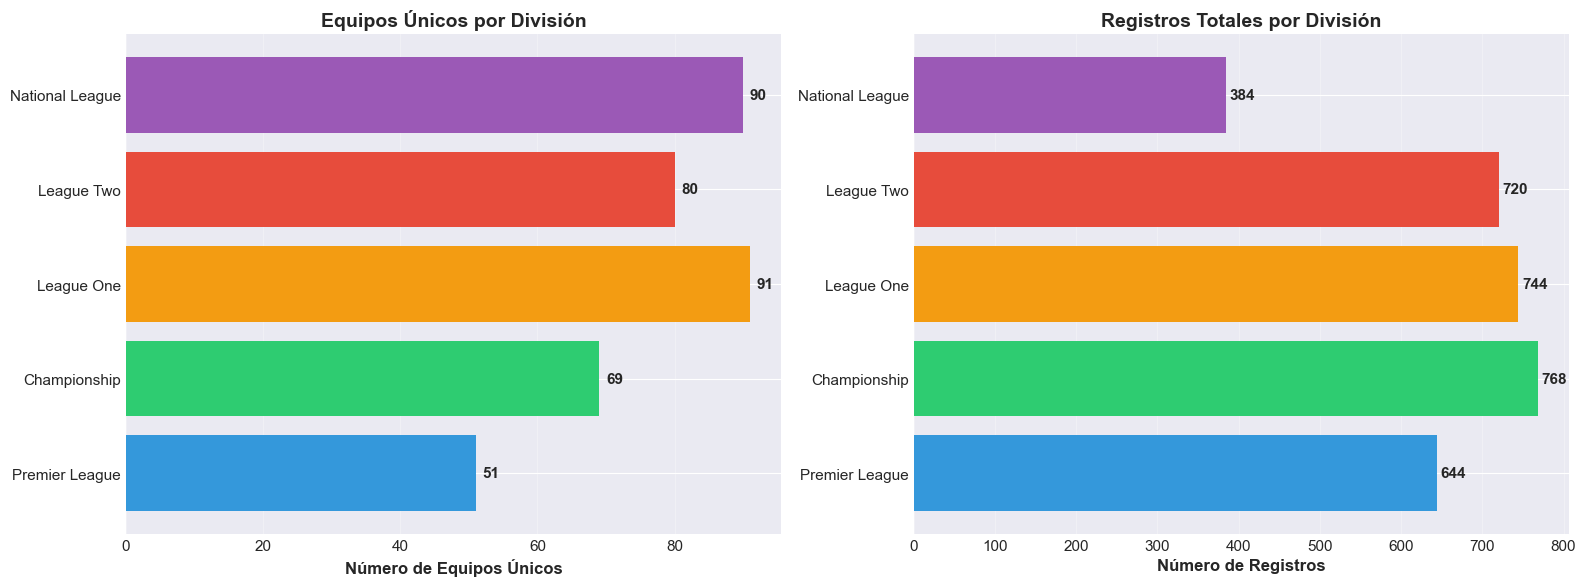

In [4]:
# Visualización: Distribución de equipos por división
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Equipos únicos por división
equipos_div = df.groupby('Division')['Equipo'].nunique().reindex(division_order)
axes[0].barh(division_order, equipos_div.values, color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c', '#9b59b6'])
axes[0].set_xlabel('Número de Equipos Únicos', fontsize=12, fontweight='bold')
axes[0].set_title('Equipos Únicos por División', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(equipos_div.values):
    axes[0].text(v + 1, i, str(v), va='center', fontweight='bold')

# Registros por división
registros_div = df.groupby('Division').size().reindex(division_order)
axes[1].barh(division_order, registros_div.values, color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c', '#9b59b6'])
axes[1].set_xlabel('Número de Registros', fontsize=12, fontweight='bold')
axes[1].set_title('Registros Totales por División', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
for i, v in enumerate(registros_div.values):
    axes[1].text(v + 5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Análisis por División



### 3.1 Premier League (Nivel 1)

In [5]:
premier = df[df['Division'] == 'Premier League'].copy()

print("="*70)
print("PREMIER LEAGUE - ANÁLISIS")
print("="*70)
print(f"Temporadas: {premier['Temporada'].nunique()}")
print(f"Equipos únicos: {premier['Equipo'].nunique()}")
print(f"Total registros: {len(premier):,}")
print(f"Periodo: {premier['Temporada'].min()} - {premier['Temporada'].max()}")

# Campeones históricos
print("\n" + "="*70)
print("CAMPEONES HISTÓRICOS")
print("="*70)
campeones = premier[premier['Pos'] == 1].groupby('Equipo').size().sort_values(ascending=False)
for equipo, titulos in campeones.items():
    print(f"{equipo}: {titulos} {'título' if titulos == 1 else 'títulos'}")

# Equipos en todas las temporadas
equipos_siempre = premier.groupby('Equipo')['Temporada'].nunique()
todas_temporadas = equipos_siempre[equipos_siempre == premier['Temporada'].nunique()]
print(f"\n" + "="*70)
print(f"EQUIPOS EN TODAS LAS {premier['Temporada'].nunique()} TEMPORADAS")
print("="*70)
for equipo in todas_temporadas.index:
    stats = premier[premier['Equipo'] == equipo]
    print(f"{equipo:15} - Mejor: {stats['Pos'].min()}°, Peor: {stats['Pos'].max()}°")

# Récord de puntos
record = premier.nlargest(1, 'Pts').iloc[0]
print(f"\n" + "="*70)
print("RÉCORD DE PUNTOS")
print("="*70)
print(f"{record['Equipo']} - {record['Pts']} pts ({record['Temporada']})")
print(f"Detalle: {record['G']}G {record['E']}E {record['P']}P | GF:{record['GF']} GC:{record['GC']}")

PREMIER LEAGUE - ANÁLISIS
Temporadas: 32
Equipos únicos: 51
Total registros: 644
Periodo: 1993-94 - 2024-25

CAMPEONES HISTÓRICOS
Man United: 12 títulos
Man City: 8 títulos
Chelsea: 5 títulos
Arsenal: 3 títulos
Liverpool: 2 títulos
Blackburn: 1 título
Leicester: 1 título

EQUIPOS EN TODAS LAS 32 TEMPORADAS
Arsenal         - Mejor: 1°, Peor: 12°
Chelsea         - Mejor: 1°, Peor: 14°
Everton         - Mejor: 4°, Peor: 17°
Liverpool       - Mejor: 1°, Peor: 8°
Man United      - Mejor: 1°, Peor: 15°
Tottenham       - Mejor: 2°, Peor: 17°

RÉCORD DE PUNTOS
Man City - 100 pts (2017-18)
Detalle: 32G 4E 2P | GF:106 GC:27


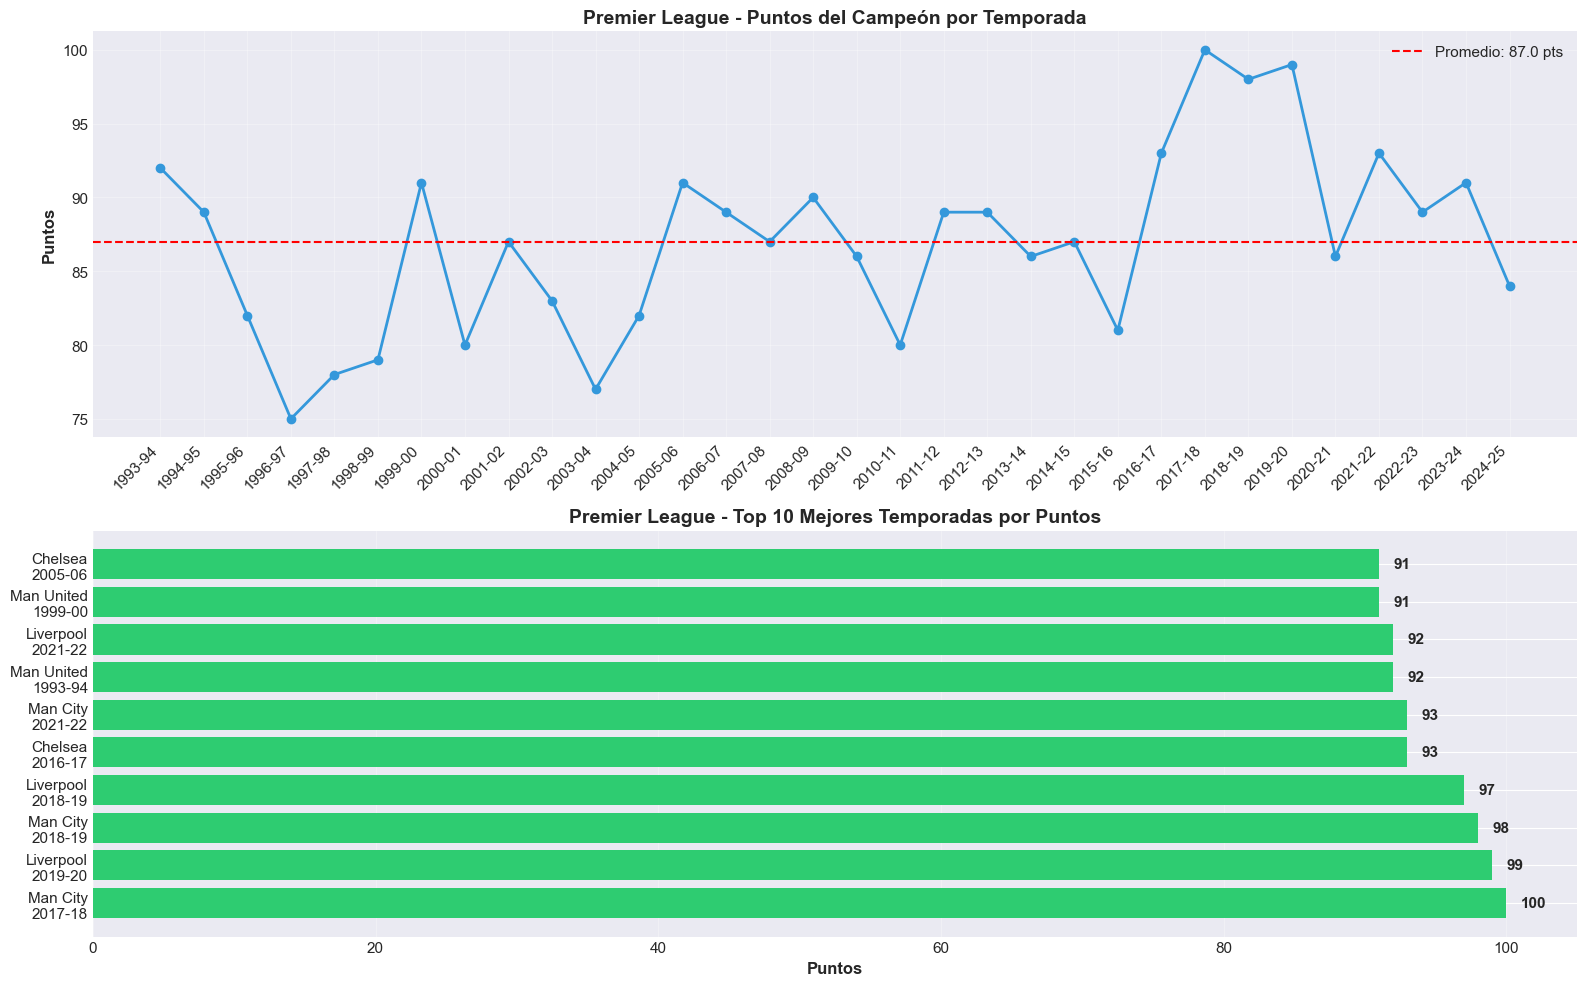

In [6]:
# Visualización Premier League: Evolución de puntos del campeón
campeones_pl = premier[premier['Pos'] == 1].sort_values('Temporada')

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Puntos del campeón por temporada
axes[0].plot(range(len(campeones_pl)), campeones_pl['Pts'].values, marker='o', linewidth=2, markersize=6, color='#3498db')
axes[0].axhline(campeones_pl['Pts'].mean(), color='red', linestyle='--', label=f'Promedio: {campeones_pl["Pts"].mean():.1f} pts')
axes[0].set_ylabel('Puntos', fontsize=12, fontweight='bold')
axes[0].set_title('Premier League - Puntos del Campeón por Temporada', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].legend()
axes[0].set_xticks(range(len(campeones_pl)))
axes[0].set_xticklabels(campeones_pl['Temporada'].values, rotation=45, ha='right')

# Récords: Top 10 mejores temporadas
top10_pl = premier.nlargest(10, 'Pts')
labels = [f"{row['Equipo']}\n{row['Temporada']}" for _, row in top10_pl.iterrows()]
axes[1].barh(range(10), top10_pl['Pts'].values, color='#2ecc71')
axes[1].set_yticks(range(10))
axes[1].set_yticklabels(labels)
axes[1].set_xlabel('Puntos', fontsize=12, fontweight='bold')
axes[1].set_title('Premier League - Top 10 Mejores Temporadas por Puntos', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
for i, v in enumerate(top10_pl['Pts'].values):
    axes[1].text(v + 1, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 3.2 Championship (Nivel 2)

In [7]:
championship = df[df['Division'] == 'Championship'].copy()

print("="*70)
print("CHAMPIONSHIP - ANÁLISIS")
print("="*70)
print(f"Temporadas: {championship['Temporada'].nunique()}")
print(f"Equipos únicos: {championship['Equipo'].nunique()}")
print(f"Total registros: {len(championship):,}")
print(f"Periodo: {championship['Temporada'].min()} - {championship['Temporada'].max()}")

# Campeones más frecuentes
print("\n" + "="*70)
print("CAMPEONES MÁS FRECUENTES")
print("="*70)
campeones_champ = championship[championship['Pos'] == 1].groupby('Equipo').size().sort_values(ascending=False).head(10)
for equipo, titulos in campeones_champ.items():
    print(f"{equipo}: {titulos} {'título' if titulos == 1 else 'títulos'}")

# Récord de puntos
record_champ = championship.nlargest(1, 'Pts').iloc[0]
print(f"\n" + "="*70)
print("RÉCORD DE PUNTOS")
print("="*70)
print(f"{record_champ['Equipo']} - {record_champ['Pts']} pts ({record_champ['Temporada']})")
print(f"Detalle: {record_champ['G']}G {record_champ['E']}E {record_champ['P']}P | GF:{record_champ['GF']} GC:{record_champ['GC']}")

# Equipos con más temporadas en Championship
print(f"\n" + "="*70)
print("EQUIPOS CON MÁS TEMPORADAS EN CHAMPIONSHIP")
print("="*70)
temp_champ = championship.groupby('Equipo')['Temporada'].nunique().sort_values(ascending=False).head(10)
for equipo, temporadas in temp_champ.items():
    print(f"{equipo}: {temporadas} temporadas")

CHAMPIONSHIP - ANÁLISIS
Temporadas: 32
Equipos únicos: 69
Total registros: 768
Periodo: 1993-94 - 2024-25

CAMPEONES MÁS FRECUENTES
Sunderland: 3 títulos
Norwich: 3 títulos
Wolves: 2 títulos
Burnley: 2 títulos
Fulham: 2 títulos
Leeds: 2 títulos
Leicester: 2 títulos
Reading: 2 títulos
Newcastle: 2 títulos
Portsmouth: 1 título

RÉCORD DE PUNTOS
Reading - 106 pts (2005-06)
Detalle: 31G 13E 2P | GF:99 GC:32

EQUIPOS CON MÁS TEMPORADAS EN CHAMPIONSHIP
Birmingham: 23 temporadas
QPR: 23 temporadas
Ipswich: 23 temporadas
Derby: 23 temporadas
Watford: 22 temporadas
Reading: 22 temporadas
Nott'm Forest: 22 temporadas
Norwich: 22 temporadas
Millwall: 21 temporadas
Sheffield United: 21 temporadas


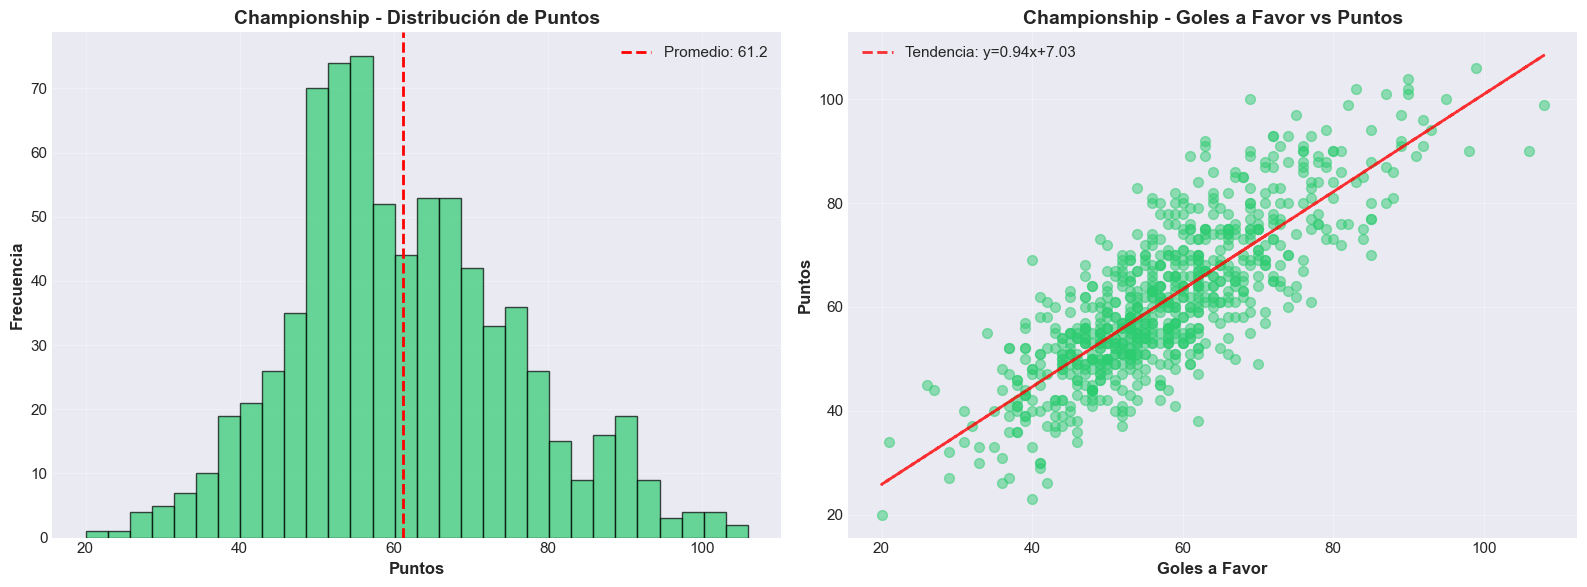

In [8]:
# Visualización Championship: Distribución de puntos y goles
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Distribución de puntos
axes[0].hist(championship['Pts'], bins=30, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0].axvline(championship['Pts'].mean(), color='red', linestyle='--', linewidth=2, label=f'Promedio: {championship["Pts"].mean():.1f}')
axes[0].set_xlabel('Puntos', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
axes[0].set_title('Championship - Distribución de Puntos', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Relación Goles a Favor vs Puntos
axes[1].scatter(championship['GF'], championship['Pts'], alpha=0.5, s=50, color='#2ecc71')
axes[1].set_xlabel('Goles a Favor', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Puntos', fontsize=12, fontweight='bold')
axes[1].set_title('Championship - Goles a Favor vs Puntos', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

# Línea de tendencia
z = np.polyfit(championship['GF'], championship['Pts'], 1)
p = np.poly1d(z)
axes[1].plot(championship['GF'], p(championship['GF']), "r--", alpha=0.8, linewidth=2, label=f'Tendencia: y={z[0]:.2f}x+{z[1]:.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

### 3.3 League One (Nivel 3)

In [9]:
league_one = df[df['Division'] == 'League One'].copy()

print("="*70)
print("LEAGUE ONE - ANÁLISIS")
print("="*70)
print(f"Temporadas: {league_one['Temporada'].nunique()}")
print(f"Equipos únicos: {league_one['Equipo'].nunique()}")
print(f"Total registros: {len(league_one):,}")
print(f"Periodo: {league_one['Temporada'].min()} - {league_one['Temporada'].max()}")

# Campeones más frecuentes
print("\n" + "="*70)
print("CAMPEONES MÁS FRECUENTES")
print("="*70)
campeones_l1 = league_one[league_one['Pos'] == 1].groupby('Equipo').size().sort_values(ascending=False).head(10)
for equipo, titulos in campeones_l1.items():
    print(f"{equipo}: {titulos} {'título' if titulos == 1 else 'títulos'}")

# Récord de puntos
record_l1 = league_one.nlargest(1, 'Pts').iloc[0]
print(f"\n" + "="*70)
print("RÉCORD DE PUNTOS")
print("="*70)
print(f"{record_l1['Equipo']} - {record_l1['Pts']} pts ({record_l1['Temporada']})")
print(f"Detalle: {record_l1['G']}G {record_l1['E']}E {record_l1['P']}P | GF:{record_l1['GF']} GC:{record_l1['GC']}")

# Promedio de goles por partido
goles_partido_l1 = (league_one['GF'].sum() + league_one['GC'].sum()) / league_one['PJ'].sum()
print(f"\nPromedio de goles por partido: {goles_partido_l1:.2f}")

LEAGUE ONE - ANÁLISIS
Temporadas: 31
Equipos únicos: 91
Total registros: 744
Periodo: 1993-94 - 2024-25

CAMPEONES MÁS FRECUENTES
Wigan: 4 títulos
Birmingham: 2 títulos
Hull: 2 títulos
Brighton: 2 títulos
Plymouth: 2 títulos
Doncaster: 1 título
Reading: 1 título
Bristol City: 1 título
Watford: 1 título
Swindon: 1 título

RÉCORD DE PUNTOS
Birmingham - 111 pts (2024-25)
Detalle: 34G 9E 3P | GF:84 GC:31

Promedio de goles por partido: 2.60


### 3.4 League Two (Nivel 4)

In [10]:
league_two = df[df['Division'] == 'League Two'].copy()

print("="*70)
print("LEAGUE TWO - ANÁLISIS")
print("="*70)
print(f"Temporadas: {league_two['Temporada'].nunique()}")
print(f"Equipos únicos: {league_two['Equipo'].nunique()}")
print(f"Total registros: {len(league_two):,}")
print(f"Periodo: {league_two['Temporada'].min()} - {league_two['Temporada'].max()}")

# Campeones más frecuentes
print("\n" + "="*70)
print("CAMPEONES MÁS FRECUENTES")
print("="*70)
campeones_l2 = league_two[league_two['Pos'] == 1].groupby('Equipo').size().sort_values(ascending=False).head(10)
for equipo, titulos in campeones_l2.items():
    print(f"{equipo}: {titulos} {'título' if titulos == 1 else 'títulos'}")

# Récord de puntos
record_l2 = league_two.nlargest(1, 'Pts').iloc[0]
print(f"\n" + "="*70)
print("RÉCORD DE PUNTOS")
print("="*70)
print(f"{record_l2['Equipo']} - {record_l2['Pts']} pts ({record_l2['Temporada']})")
print(f"Detalle: {record_l2['G']}G {record_l2['E']}E {record_l2['P']}P | GF:{record_l2['GF']} GC:{record_l2['GC']}")

LEAGUE TWO - ANÁLISIS
Temporadas: 30
Equipos únicos: 80
Total registros: 720
Periodo: 1995-96 - 2024-25

CAMPEONES MÁS FRECUENTES
Chesterfield: 2 títulos
Doncaster: 2 títulos
Notts County: 2 títulos
Brentford: 2 títulos
Accrington: 1 título
Milton Keynes Dons: 1 título
Walsall: 1 título
Swindon: 1 título
Swansea: 1 título
Stockport: 1 título

RÉCORD DE PUNTOS
Plymouth - 102 pts (2001-02)
Detalle: 31G 9E 6P | GF:71 GC:28


### 3.5 National League (Nivel 5)

In [26]:
national = df[df['Division'] == 'National League'].copy()

print("="*70)
print("NATIONAL LEAGUE - ANÁLISIS")
print("="*70)
print(f"Temporadas: {national['Temporada'].nunique()}")
print(f"Equipos únicos: {national['Equipo'].nunique()}")
print(f"Total registros: {len(national):,}")
print(f"Periodo: {national['Temporada'].min()} - {national['Temporada'].max()}")

# Campeones más frecuentes
print("\n" + "="*70)
print("CAMPEONES MÁS FRECUENTES")
print("="*70)
campeones_nl = national[national['Pos'] == 1].groupby('Equipo').size().sort_values(ascending=False).head(10)
for equipo, titulos in campeones_nl.items():
    print(f"{equipo}: {titulos} {'título' if titulos == 1 else 'títulos'}")

# Récord de puntos
record_nl = national.nlargest(1, 'Pts').iloc[0]
print(f"\n" + "="*70)
print("RÉCORD DE PUNTOS")
print("="*70)
print(f"{record_nl['Equipo']} - {record_nl['Pts']} pts ({record_nl['Temporada']})")
print(f"Detalle: {record_nl['G']}G {record_nl['E']}E {record_nl['P']}P | GF:{record_nl['GF']} GC:{record_nl['GC']}")

NATIONAL LEAGUE - ANÁLISIS
Temporadas: 16
Equipos únicos: 90
Total registros: 384
Periodo: 2006-07 - 2024-25

CAMPEONES MÁS FRECUENTES
Barnet: 2 títulos
Aldershot: 1 título
Barrow: 1 título
Burton: 1 título
Cheltenham: 1 título
Chesterfield: 1 título
Crawley Town: 1 título
Dag and Red: 1 título
Fleetwood Town: 1 título
Leyton Orient: 1 título

RÉCORD DE PUNTOS
Wrexham - 111 pts (2022-23)
Detalle: 34G 9E 3P | GF:116 GC:43


## 4. Comparación Entre Divisiones

In [27]:
# Comparación de promedios por división
comparacion = df.groupby('Division').agg({
    'Pts': 'mean',
    'GF': 'mean',
    'GC': 'mean',
    'G': 'mean',
    'E': 'mean',
    'P': 'mean'
}).round(2)

comparacion.columns = ['Pts_Prom', 'GF_Prom', 'GC_Prom', 'Victorias_Prom', 'Empates_Prom', 'Derrotas_Prom']
comparacion = comparacion.reindex(division_order)

print("="*90)
print("COMPARACIÓN DE PROMEDIOS POR DIVISIÓN")
print("="*90)
print(comparacion)
print("\n" + "="*90)

COMPARACIÓN DE PROMEDIOS POR DIVISIÓN
                 Pts_Prom  GF_Prom  GC_Prom  Victorias_Prom  Empates_Prom  \
Division                                                                    
Premier League      52.16    51.18    51.18           14.16          9.67   
Championship        61.21    57.68    57.68           16.30         12.32   
League One          61.28    58.22    58.22           16.42         12.02   
League Two          60.69    56.56    56.56           16.13         12.29   
National League     62.31    61.75    61.75           16.84         11.80   

                 Derrotas_Prom  
Division                        
Premier League           14.16  
Championship             16.30  
League One               16.42  
League Two               16.13  
National League          16.84  



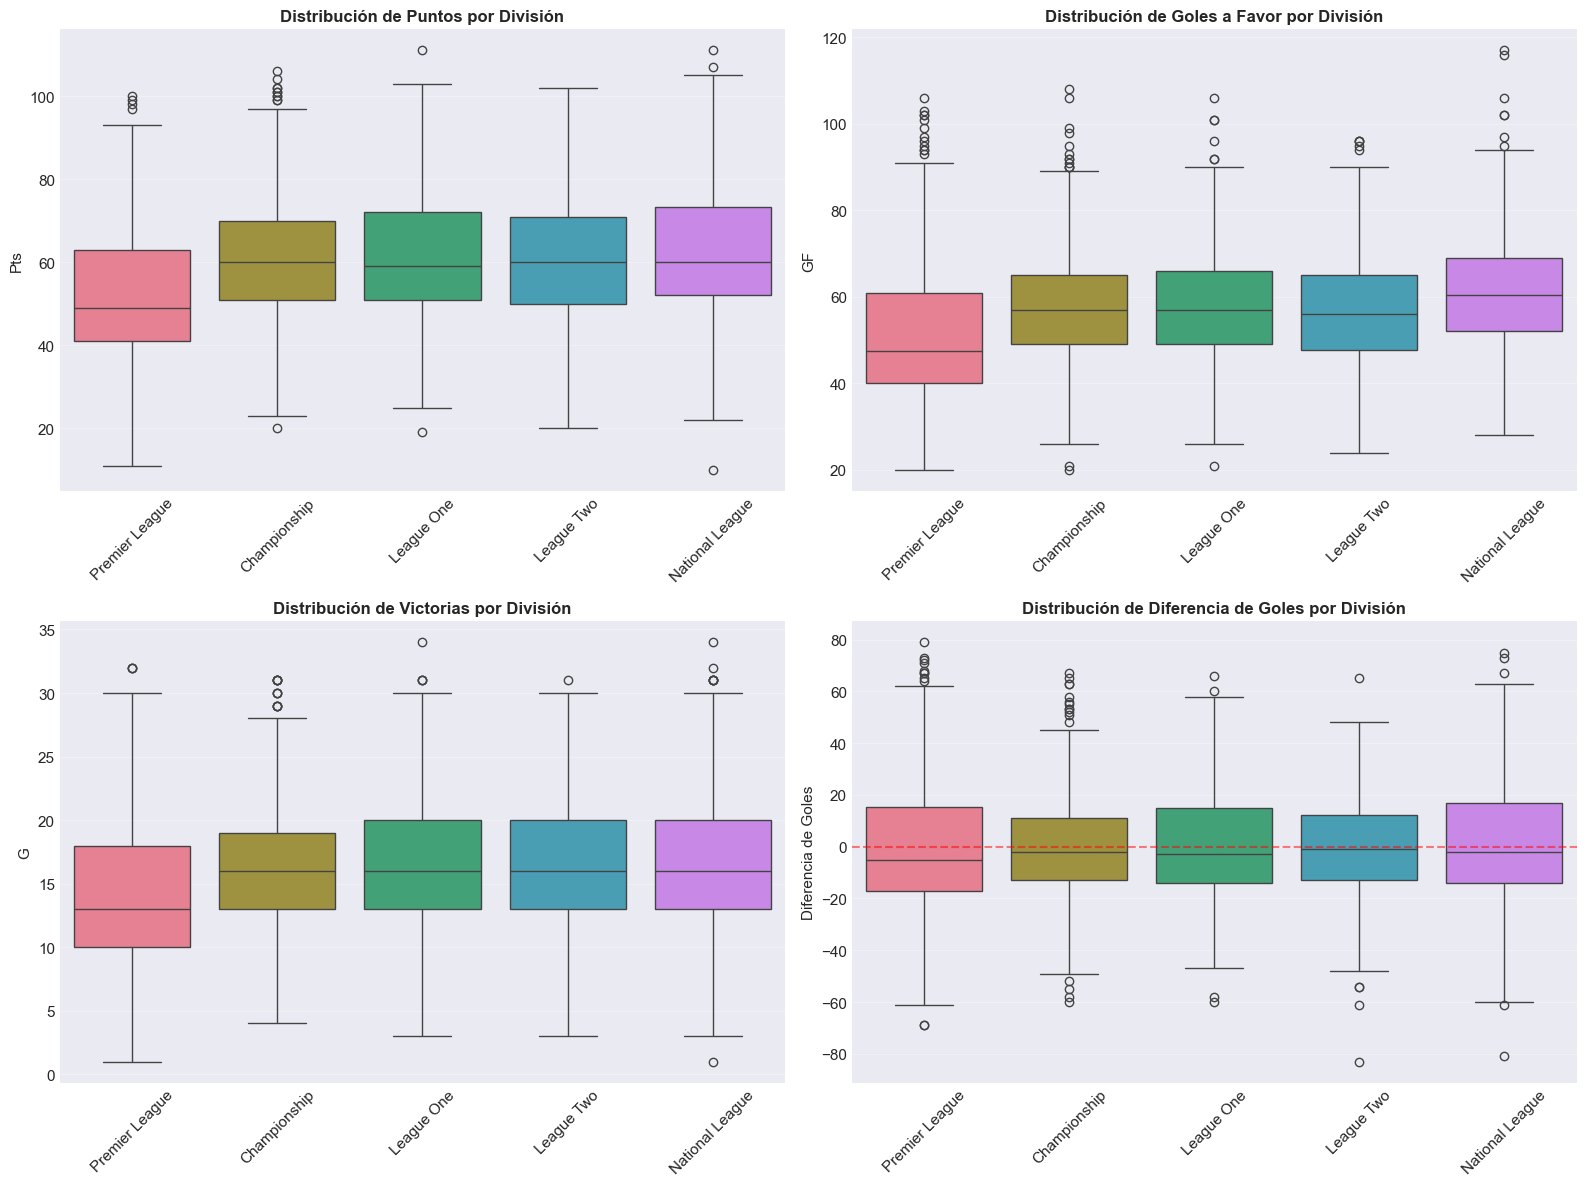

In [28]:
# Visualización: Box plots comparativos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Puntos
df_ordered = df.copy()
df_ordered['Division'] = pd.Categorical(df_ordered['Division'], categories=division_order, ordered=True)
df_ordered = df_ordered.sort_values('Division')

sns.boxplot(data=df_ordered, x='Division', y='Pts', ax=axes[0, 0], palette='husl')
axes[0, 0].set_title('Distribución de Puntos por División', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Goles a Favor
sns.boxplot(data=df_ordered, x='Division', y='GF', ax=axes[0, 1], palette='husl')
axes[0, 1].set_title('Distribución de Goles a Favor por División', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Victorias
sns.boxplot(data=df_ordered, x='Division', y='G', ax=axes[1, 0], palette='husl')
axes[1, 0].set_title('Distribución de Victorias por División', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Diferencia de goles (convertir a numérico)
df_ordered['Dif_num'] = df_ordered['Dif'].astype(str).str.replace('+', '').astype(int)
sns.boxplot(data=df_ordered, x='Division', y='Dif_num', ax=axes[1, 1], palette='husl')
axes[1, 1].set_title('Distribución de Diferencia de Goles por División', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Diferencia de Goles')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].axhline(0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 5. Análisis de Movilidad Entre Divisiones

In [29]:
# Equipos con mayor movilidad
if 'Divisiones_Jugadas' in tracking.columns:
    movilidad = tracking[['Equipo', 'Total_Temporadas', 'Divisiones_Jugadas', 'Mejor_Division']].copy()
    movilidad = movilidad.sort_values('Divisiones_Jugadas', ascending=False)
    
    print("="*70)
    print("TOP 20 EQUIPOS CON MAYOR MOVILIDAD ENTRE DIVISIONES")
    print("="*70)
    print(movilidad.head(20).to_string(index=False))
    
    # Equipos que han jugado en todas las divisiones
    todas_divisiones = movilidad[movilidad['Divisiones_Jugadas'] == 5]
    if len(todas_divisiones) > 0:
        print(f"\n" + "="*70)
        print(f"EQUIPOS QUE HAN JUGADO EN LAS 5 DIVISIONES ({len(todas_divisiones)})")
        print("="*70)
        for _, row in todas_divisiones.iterrows():
            print(f"{row['Equipo']:20} - {int(row['Total_Temporadas'])} temporadas")
else:
    print("Columna 'Divisiones_Jugadas' no encontrada en tracking")

TOP 20 EQUIPOS CON MAYOR MOVILIDAD ENTRE DIVISIONES
      Equipo  Total_Temporadas  Divisiones_Jugadas Mejor_Division
      Oldham                32                   5   Championship
       Luton                31                   5   Championship
       Wigan                30                   4   Championship
     Cardiff                32                   4   Championship
    Bradford                32                   4   Championship
   Brentford                32                   4   Championship
    Brighton                32                   4   Championship
    Southend                30                   4   Championship
 Bournemouth                32                   4   Championship
Notts County                30                   4   Championship
     Swindon                32                   4   Championship
   Stockport                24                   4   Championship
  Portsmouth                31                   4   Championship
    Tranmere            

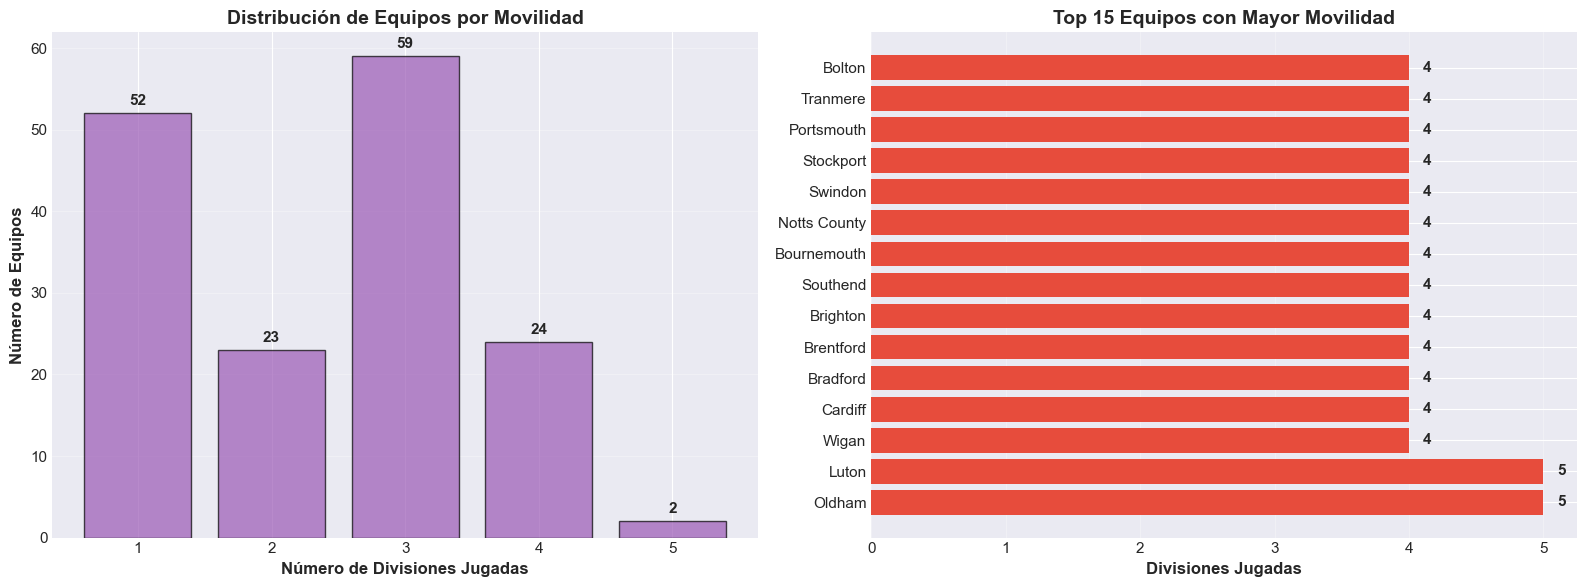

In [15]:
# Visualización de movilidad
if 'Divisiones_Jugadas' in tracking.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Distribución de equipos por número de divisiones jugadas
    div_jugadas = tracking['Divisiones_Jugadas'].value_counts().sort_index()
    axes[0].bar(div_jugadas.index, div_jugadas.values, color='#9b59b6', alpha=0.7, edgecolor='black')
    axes[0].set_xlabel('Número de Divisiones Jugadas', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Número de Equipos', fontsize=12, fontweight='bold')
    axes[0].set_title('Distribución de Equipos por Movilidad', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    for i, v in enumerate(div_jugadas.values):
        axes[0].text(div_jugadas.index[i], v + 1, str(v), ha='center', fontweight='bold')
    
    # Top 15 equipos más viajados
    top_movilidad = movilidad.nlargest(15, 'Divisiones_Jugadas')
    axes[1].barh(range(15), top_movilidad['Divisiones_Jugadas'].values, color='#e74c3c')
    axes[1].set_yticks(range(15))
    axes[1].set_yticklabels(top_movilidad['Equipo'].values)
    axes[1].set_xlabel('Divisiones Jugadas', fontsize=12, fontweight='bold')
    axes[1].set_title('Top 15 Equipos con Mayor Movilidad', fontsize=14, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    for i, v in enumerate(top_movilidad['Divisiones_Jugadas'].values):
        axes[1].text(v + 0.1, i, str(int(v)), va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## 6. Funciones de Consulta Personalizadas

In [16]:
def ver_historial_equipo(equipo_nombre):
    """
    Muestra el historial completo de un equipo a través de todas las divisiones
    """
    # Buscar coincidencias
    equipos_disponibles = df['Equipo'].unique()
    coincidencias = [e for e in equipos_disponibles if equipo_nombre.lower() in e.lower()]
    
    if not coincidencias:
        print(f"❌ No se encontró ningún equipo con '{equipo_nombre}'")
        return
    
    if len(coincidencias) > 1:
        print(f"⚠️  Se encontraron {len(coincidencias)} equipos:")
        for e in coincidencias:
            print(f"   - {e}")
        print("\nPor favor, especifica mejor el nombre del equipo")
        return
    
    equipo = coincidencias[0]
    historial = df[df['Equipo'] == equipo].sort_values('Temporada')
    
    print("\n" + "="*80)
    print(f"HISTORIAL COMPLETO: {equipo}")
    print("="*80)
    print(f"Temporadas jugadas: {len(historial)}")
    print(f"Divisiones jugadas: {historial['Division'].nunique()}")
    print(f"\nPor división:")
    for div in division_order:
        div_data = historial[historial['Division'] == div]
        if len(div_data) > 0:
            print(f"  {div}: {len(div_data)} temporadas")
    
    print(f"\nMejor posición: {historial['Pos'].min()}° ({historial[historial['Pos'] == historial['Pos'].min()]['Temporada'].values[0]} - {historial[historial['Pos'] == historial['Pos'].min()]['Division'].values[0]})")
    print(f"Peor posición: {historial['Pos'].max()}° ({historial[historial['Pos'] == historial['Pos'].max()]['Temporada'].values[0]} - {historial[historial['Pos'] == historial['Pos'].max()]['Division'].values[0]})")
    print(f"\nTítulos (1° lugar): {len(historial[historial['Pos'] == 1])}")
    
    print("\n" + "="*80)
    print("HISTORIAL DETALLADO")
    print("="*80)
    print(historial[['Temporada', 'Division', 'Pos', 'PJ', 'G', 'E', 'P', 'Pts', 'GF', 'GC']].to_string(index=False))
    
    return historial

# Ejemplo de uso:
# ver_historial_equipo('Leicester')

In [17]:
def ver_temporada_division(temporada, division):
    """
    Muestra la clasificación completa de una división en una temporada específica
    """
    temp_data = df[(df['Temporada'] == temporada) & (df['Division'] == division)].sort_values('Pos')
    
    if len(temp_data) == 0:
        print(f"❌ No se encontraron datos para {division} en temporada {temporada}")
        return
    
    print("\n" + "="*90)
    print(f"{division.upper()} - TEMPORADA {temporada}")
    print("="*90)
    print(temp_data[['Pos', 'Equipo', 'PJ', 'G', 'E', 'P', 'Pts', 'GF', 'GC', 'Dif']].to_string(index=False))
    print("\n" + "="*90)
    
    # Estadísticas de la temporada
    print(f"\nEstadísticas de la temporada:")
    print(f"  Campeón: {temp_data.iloc[0]['Equipo']} ({temp_data.iloc[0]['Pts']} pts)")
    print(f"  Promedio de puntos: {temp_data['Pts'].mean():.2f}")
    print(f"  Total de goles: {temp_data['GF'].sum()}")
    print(f"  Goles por partido: {(temp_data['GF'].sum() + temp_data['GC'].sum()) / temp_data['PJ'].sum():.2f}")
    
    return temp_data

# Ejemplo de uso:
# ver_temporada_division('2015-16', 'Premier League')  # Temporada del Leicester

In [18]:
def comparar_equipos(*equipos):
    """
    Compara el historial de múltiples equipos a través de todas las divisiones
    """
    comparacion = []
    
    for equipo_nombre in equipos:
        coincidencias = [e for e in df['Equipo'].unique() if equipo_nombre.lower() in e.lower()]
        
        if len(coincidencias) == 1:
            equipo = coincidencias[0]
            historial = df[df['Equipo'] == equipo]
            
            comparacion.append({
                'Equipo': equipo,
                'Temporadas': len(historial),
                'Divisiones': historial['Division'].nunique(),
                'Títulos': len(historial[historial['Pos'] == 1]),
                'Top 3': len(historial[historial['Pos'] <= 3]),
                'Mejor_Pos': historial['Pos'].min(),
                'Peor_Pos': historial['Pos'].max(),
                'Total_Pts': historial['Pts'].sum(),
                'Prom_Pts': historial['Pts'].mean(),
                'Total_GF': historial['GF'].sum(),
                'Total_GC': historial['GC'].sum()
            })
        elif len(coincidencias) == 0:
            print(f"⚠️  No se encontró '{equipo_nombre}'")
        else:
            print(f"⚠️  Múltiples coincidencias para '{equipo_nombre}': {coincidencias}")
    
    if comparacion:
        comp_df = pd.DataFrame(comparacion)
        print("\n" + "="*120)
        print("COMPARACIÓN DE EQUIPOS")
        print("="*120)
        print(comp_df.to_string(index=False))
        print("\n" + "="*120)
        return comp_df
    
    return None

# Ejemplo de uso:
# comparar_equipos('Leicester', 'Southampton', 'Newcastle')

## 7. Récords Históricos por División

In [19]:
print("="*90)
print("RÉCORDS HISTÓRICOS POR DIVISIÓN")
print("="*90)

for division in division_order:
    div_data = df[df['Division'] == division]
    
    print(f"\n{'='*90}")
    print(f"{division.upper()}")
    print(f"{'='*90}")
    
    # Más puntos
    record_pts = div_data.nlargest(1, 'Pts').iloc[0]
    print(f"MÁS PUNTOS: {record_pts['Equipo']} - {record_pts['Pts']} pts ({record_pts['Temporada']})")
    
    # Más goles a favor
    record_gf = div_data.nlargest(1, 'GF').iloc[0]
    print(f"MÁS GOLES A FAVOR: {record_gf['Equipo']} - {record_gf['GF']} goles ({record_gf['Temporada']})")
    
    # Menos goles en contra
    record_gc = div_data.nsmallest(1, 'GC').iloc[0]
    print(f"MENOS GOLES EN CONTRA: {record_gc['Equipo']} - {record_gc['GC']} goles ({record_gc['Temporada']})")
    
    # Más victorias
    record_w = div_data.nlargest(1, 'G').iloc[0]
    print(f"MÁS VICTORIAS: {record_w['Equipo']} - {record_w['G']} victorias ({record_w['Temporada']})")
    
    # Mejor diferencia de goles
    div_data_copy = div_data.copy()
    div_data_copy['Dif_num'] = div_data_copy['Dif'].astype(str).str.replace('+', '').astype(int)
    record_dif = div_data_copy.nlargest(1, 'Dif_num').iloc[0]
    print(f"MEJOR DIFERENCIA: {record_dif['Equipo']} - {record_dif['Dif']} ({record_dif['Temporada']})")

print("\n" + "="*90)

RÉCORDS HISTÓRICOS POR DIVISIÓN

PREMIER LEAGUE
MÁS PUNTOS: Man City - 100 pts (2017-18)
MÁS GOLES A FAVOR: Man City - 106 goles (2017-18)
MENOS GOLES EN CONTRA: Chelsea - 12 goles (2004-05)
MÁS VICTORIAS: Man City - 32 victorias (2017-18)
MEJOR DIFERENCIA: Man City - 79 (2017-18)

CHAMPIONSHIP
MÁS PUNTOS: Reading - 106 pts (2005-06)
MÁS GOLES A FAVOR: Man City - 108 goles (2001-02)
MENOS GOLES EN CONTRA: Burnley - 16 goles (2024-25)
MÁS VICTORIAS: Sunderland - 31 victorias (1998-99)
MEJOR DIFERENCIA: Reading - 67 (2005-06)

LEAGUE ONE
MÁS PUNTOS: Birmingham - 111 pts (2024-25)
MÁS GOLES A FAVOR: Peterboro - 106 goles (2010-11)
MENOS GOLES EN CONTRA: Wigan - 18 goles (2002-03)
MÁS VICTORIAS: Birmingham - 34 victorias (2024-25)
MEJOR DIFERENCIA: Ipswich - 66 (2022-23)

LEAGUE TWO
MÁS PUNTOS: Plymouth - 102 pts (2001-02)
MÁS GOLES A FAVOR: Luton - 96 goles (2001-02)
MENOS GOLES EN CONTRA: Gillingham - 20 goles (1995-96)
MÁS VICTORIAS: Plymouth - 31 victorias (2001-02)
MEJOR DIFERENCIA: N

## 8. Análisis de Tendencias Temporales

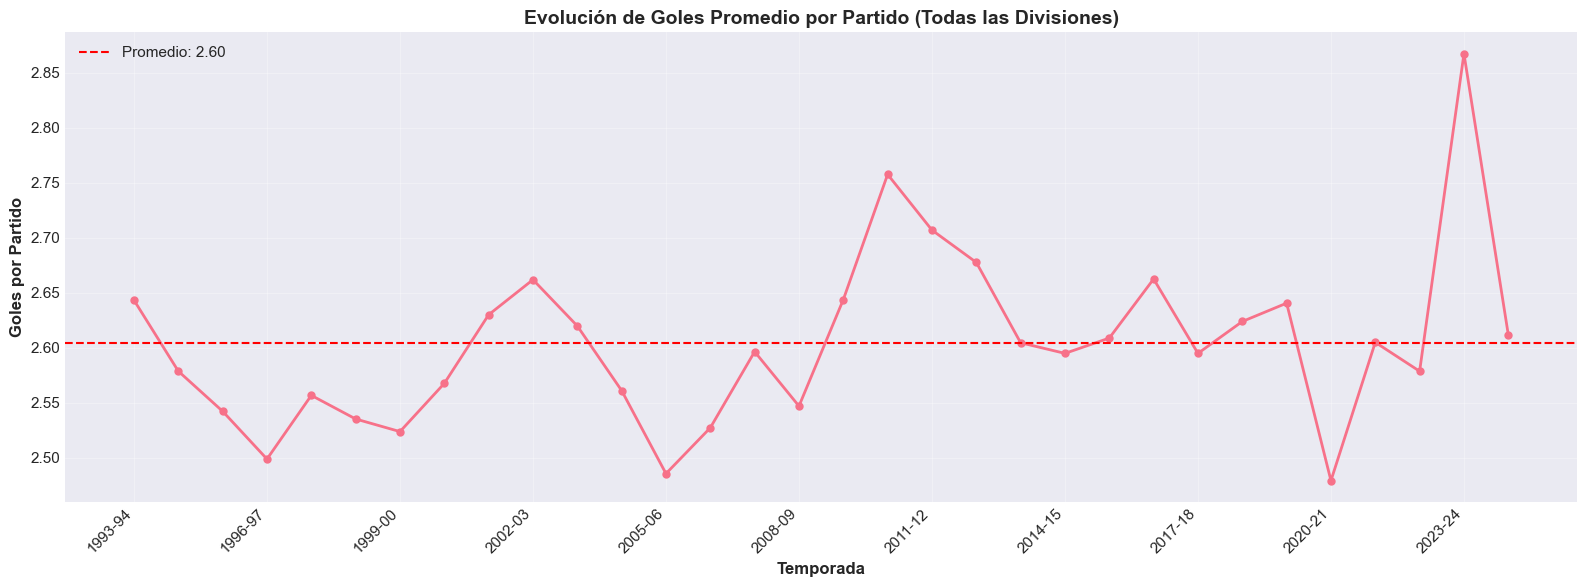

In [20]:
# Evolución de goles promedio por temporada
goles_temporada = df.groupby('Temporada').apply(
    lambda x: (x['GF'].sum() + x['GC'].sum()) / x['PJ'].sum()
)

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(range(len(goles_temporada)), goles_temporada.values, marker='o', linewidth=2, markersize=5)
ax.axhline(goles_temporada.mean(), color='red', linestyle='--', label=f'Promedio: {goles_temporada.mean():.2f}')
ax.set_xlabel('Temporada', fontsize=12, fontweight='bold')
ax.set_ylabel('Goles por Partido', fontsize=12, fontweight='bold')
ax.set_title('Evolución de Goles Promedio por Partido (Todas las Divisiones)', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
ax.legend()
ax.set_xticks(range(0, len(goles_temporada), 3))
ax.set_xticklabels(goles_temporada.index[::3], rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 9. Consultas Personalizadas

Usa las funciones definidas arriba para hacer tus propias consultas:

In [21]:
# Ejemplo 1: Ver historial de un equipo
ver_historial_equipo('Leicester')


HISTORIAL COMPLETO: Leicester
Temporadas jugadas: 32
Divisiones jugadas: 3

Por división:
  Premier League: 18 temporadas
  Championship: 13 temporadas
  League One: 1 temporadas

Mejor posición: 1° (2008-09 - League One)
Peor posición: 22° (2007-08 - Championship)

Títulos (1° lugar): 4

HISTORIAL DETALLADO
Temporada       Division  Pos  PJ  G  E  P  Pts  GF  GC
  1993-94   Championship    3  45 19 16 10   73  72  58
  1994-95 Premier League   21  42  6 11 25   29  45  80
  1995-96   Championship    6  43 18 13 12   67  62  56
  1996-97 Premier League    9  38 12 11 15   47  46  54
  1997-98 Premier League   10  38 13 14 11   53  51  41
  1998-99 Premier League   10  38 12 13 13   49  40  46
  1999-00 Premier League    8  38 16  7 15   55  55  55
  2000-01 Premier League   13  38 14  6 18   48  39  51
  2001-02 Premier League   20  38  5 13 20   28  30  64
  2002-03   Championship    2  43 24 13  6   85  67  39
  2003-04 Premier League   18  33  6 15 12   33  45  56
  2004-05   Champ

,Temporada,Division,Pos,Equipo,PJ,G,E,P,Pts,GF,GC,Dif
646,1993-94,Championship,3,Leicester,45,19,16,10,73,72,58,14
42,1994-95,Premier League,21,Leicester,42,6,11,25,29,45,80,-35
697,1995-96,Championship,6,Leicester,43,18,13,12,67,62,56,6
72,1996-97,Premier League,9,Leicester,38,12,11,15,47,46,54,-8
93,1997-98,Premier League,10,Leicester,38,13,14,11,53,51,41,10
113,1998-99,Premier League,10,Leicester,38,12,13,13,49,40,46,-6
131,1999-00,Premier League,8,Leicester,38,16,7,15,55,55,55,0
156,2000-01,Premier League,13,Leicester,38,14,6,18,48,39,51,-12
183,2001-02,Premier League,20,Leicester,38,5,13,20,28,30,64,-34
861,2002-03,Championship,2,Leicester,43,24,13,6,85,67,39,28


In [22]:
# Ejemplo 2: Ver temporada específica
ver_temporada_division('2015-16', 'Premier League')  # Temporada del Leicester campeón


PREMIER LEAGUE - TEMPORADA 2015-16
 Pos         Equipo  PJ  G  E  P  Pts  GF  GC  Dif
   1      Leicester  38 23 12  3   81  68  36   32
   2        Arsenal  38 20 11  7   71  65  36   29
   3      Tottenham  38 19 13  6   70  69  35   34
   4       Man City  38 19  9 10   66  71  41   30
   5     Man United  38 19  9 10   66  49  35   14
   6    Southampton  38 18  9 11   63  59  41   18
   7       West Ham  38 16 14  8   62  65  51   14
   8      Liverpool  38 16 12 10   60  63  50   13
   9          Stoke  38 14  9 15   51  41  55  -14
  10        Chelsea  38 12 14 12   50  59  53    6
  11        Everton  38 11 14 13   47  59  55    4
  12        Swansea  38 12 11 15   47  42  52  -10
  13        Watford  38 12  9 17   45  40  50  -10
  14      West Brom  38 10 13 15   43  34  48  -14
  15 Crystal Palace  38 11  9 18   42  39  51  -12
  16    Bournemouth  38 11  9 18   42  45  67  -22
  17     Sunderland  38  9 12 17   39  48  62  -14
  18      Newcastle  38  9 10 19   37  44  65 

,Temporada,Division,Pos,Equipo,PJ,G,E,P,Pts,GF,GC,Dif
444,2015-16,Premier League,1,Leicester,38,23,12,3,81,68,36,32
445,2015-16,Premier League,2,Arsenal,38,20,11,7,71,65,36,29
446,2015-16,Premier League,3,Tottenham,38,19,13,6,70,69,35,34
447,2015-16,Premier League,4,Man City,38,19,9,10,66,71,41,30
448,2015-16,Premier League,5,Man United,38,19,9,10,66,49,35,14
449,2015-16,Premier League,6,Southampton,38,18,9,11,63,59,41,18
450,2015-16,Premier League,7,West Ham,38,16,14,8,62,65,51,14
451,2015-16,Premier League,8,Liverpool,38,16,12,10,60,63,50,13
452,2015-16,Premier League,9,Stoke,38,14,9,15,51,41,55,-14
453,2015-16,Premier League,10,Chelsea,38,12,14,12,50,59,53,6


In [23]:
# Ejemplo 3: Comparar equipos
comparar_equipos('Man City', 'Liverpool', 'Chelsea', 'Arsenal')


COMPARACIÓN DE EQUIPOS
   Equipo  Temporadas  Divisiones  Títulos  Top 3  Mejor_Pos  Peor_Pos  Total_Pts  Prom_Pts  Total_GF  Total_GC
 Man City          32           3        9     17          1        20       2177     68.03      2205      1352
Liverpool          32           1        2     14          1         8       2274     71.06      2195      1209
  Chelsea          32           1        5     15          1        14       2237     69.91      2087      1218
  Arsenal          32           1        3     17          1        12       2307     72.09      2199      1210



,Equipo,Temporadas,Divisiones,Títulos,Top 3,Mejor_Pos,Peor_Pos,Total_Pts,Prom_Pts,Total_GF,Total_GC
0,Man City,32,3,9,17,1,20,2177,68.03,2205,1352
1,Liverpool,32,1,2,14,1,8,2274,71.06,2195,1209
2,Chelsea,32,1,5,15,1,14,2237,69.91,2087,1218
3,Arsenal,32,1,3,17,1,12,2307,72.09,2199,1210


In [24]:
# Ejemplo 4: Equipos que más han ascendido/descendido
# Analizar equipos en Championship que llegaron a Premier League
equipos_championship = df[df['Division'] == 'Championship']['Equipo'].unique()
equipos_premier = df[df['Division'] == 'Premier League']['Equipo'].unique()
equipos_ascendidos = set(equipos_championship) & set(equipos_premier)

print(f"\nEquipos que han jugado en Championship y Premier League: {len(equipos_ascendidos)}")
print("\nAlgunos ejemplos:")
for equipo in list(equipos_ascendidos)[:10]:
    print(f"  - {equipo}")


Equipos que han jugado en Championship y Premier League: 45

Algunos ejemplos:
  - Cardiff
  - Fulham
  - Huddersfield
  - Aston Villa
  - Reading
  - Charlton
  - Sheffield Weds
  - Crystal Palace
  - Derby
  - West Brom


## 10. Exportar Resultados

Guarda análisis específicos para uso posterior

In [25]:
# Crear resumen ejecutivo
resumen_ejecutivo = {
    'Total_Registros': len(df),
    'Total_Divisiones': df['Division'].nunique(),
    'Total_Temporadas': df['Temporada'].nunique(),
    'Total_Equipos': df['Equipo'].nunique(),
    'Total_Partidos': df['PJ'].sum(),
    'Total_Goles': df['GF'].sum() + df['GC'].sum(),
    'Goles_Por_Partido_Promedio': (df['GF'].sum() + df['GC'].sum()) / df['PJ'].sum()
}

print("\n" + "="*70)
print("RESUMEN EJECUTIVO - ENGLISH FOOTBALL PYRAMID")
print("="*70)
for key, value in resumen_ejecutivo.items():
    if isinstance(value, float):
        print(f"{key.replace('_', ' ')}: {value:.2f}")
    else:
        print(f"{key.replace('_', ' ')}: {value:,}")
print("="*70)

# Opcional: Guardar en CSV
# pd.DataFrame([resumen_ejecutivo]).to_csv('resumen_ejecutivo_english_leagues.csv', index=False)
# print("\n✓ Resumen guardado en 'resumen_ejecutivo_english_leagues.csv'")


RESUMEN EJECUTIVO - ENGLISH FOOTBALL PYRAMID
Total Registros: 3,260
Total Divisiones: 5
Total Temporadas: 32
Total Equipos: 160
Total Partidos: 141,878
Total Goles: 370,026
Goles Por Partido Promedio: 2.61


---

## 📝 Notas Finales

Este notebook proporciona un análisis completo de las 5 divisiones del fútbol inglés. Puedes:

- Ejecutar todas las celdas para obtener el análisis completo
- Usar las funciones personalizadas para consultas específicas
- Modificar las visualizaciones según tus necesidades
- Exportar resultados para uso posterior

**Dataset**: `english_leagues_completo.csv` (2,516 registros)
**Tracking**: `english_leagues_tracking.csv` (159 equipos)
**Periodo**: 1993-2025 (32 temporadas)

---

🤖 Notebook generado como parte del proyecto English Football Pyramid v3.0